# Machine Learning: Session 2

## Regression, regularization and cross-validation

In this task you will experiment with linear regression and see what happens when we use regularized versions of it. More precisely, you will try out Ridge and Lasso regularization. In addition, we will see how using cross-validation helps us to get more stable estimates for our performance.

Read in the data in **data.csv** and split it into training (50%) and testing (50%) set. Use random seed 0 (train_test_split method).

In [2]:
import pandas as pd
import sklearn
import numpy as np

CRED = '\033[91m'
CEND = '\033[0m'

data = pd.read_csv("data.csv", index_col = 0)

data.shape

(200, 100)

In [3]:
##### YOUR CODE STARTS ##### (please do not delete this line)

In [4]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.5, random_state=0)


print("Training data shape: {}, Testing data shape: {}".format(train_data.shape, test_data.shape))

Training data shape: (100, 100), Testing data shape: (100, 100)


In [5]:
##### YOUR CODE ENDS ##### (please do not delete this line)

## Task 1. Multivariate linear regression (1 point)

#### <font color='purple'>(a) Implement the fitting procedure of non-regularized multivariate ordinary least squares linear regression, as presented in the lecture slides (matrix operations). Fit on the training data and save the coefficients and the intercept for use in subtask (1c). Print out the coefficients corresponding to the five first features.

In [6]:
##### YOUR CODE STARTS ##### (please do not delete this line)

In [7]:
# extract features only and dropping the y column (target label)
train_features = train_data.drop(['y'], inplace=False, axis=1)
# extract the y column (target label) only
train_labels = train_data['y']
# inserting a bias term as column and the column copy x1 shape but values = 1
train_features.insert(0, 'bias', np.ones_like(train_features['x1']))
# calculates the (Xt.x)^-1.Xt.y
w = np.linalg.inv(train_features.T.dot(train_features)).dot(train_features.T).dot(train_labels)
# provides the first five coefficients
first_five_my_ols_coefficients = w[1:6]

In [8]:
##### YOUR CODE ENDS ##### (please do not delete this line)

In [9]:
print('Coefficients of five first features according to my OLS implementation:', first_five_my_ols_coefficients)

Coefficients of five first features according to my OLS implementation: [11.85875833  7.7562925   9.63087962  6.99932448  4.99498325]


#### <font color='purple'>(b) Call out the `sklearn.linear_model.LinearRegression` learning algorithm from the sklearn package. Fit the model on the training data and save it for use in the following subtasks. Print out the coefficients corresponding to the five first features.

In [10]:
##### YOUR CODE STARTS ##### (please do not delete this line)

In [11]:
from sklearn.linear_model import LinearRegression
# extract features only and dropping the y column (target label)
train_features = train_data.drop(['y'], inplace=False, axis=1)
# extract the y column (target label) only
train_labels = train_data['y']
# Using the sklearn to calculate the equation itself
w_reg = LinearRegression().fit(train_features, train_labels)

first_five_sklearn_ols_coefficients = w_reg.coef_[0:5]

In [12]:
##### YOUR CODE ENDS ##### (please do not delete this line)

In [13]:
print('Coefficients of five first features according to sklearn OLS implementation:', first_five_sklearn_ols_coefficients)

Coefficients of five first features according to sklearn OLS implementation: [11.85875833  7.7562925   9.63087962  6.99932448  4.99498325]


#### <font color='purple'>(c) Demonstrate that the methods of subtasks (1a) and (1b) give the same results by showing that they find the same coefficients and intercept. </font>

You maybe won't get exactly the same results because of precision problems of floats so the idea is to compare if the values are equal up to some precision (e.g. check if the difference is less than 0.000001). If for some reason you are not able to get the assertions to pass with the given precision then please change the precision such that the assertions would pass.

In [14]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("Please assign intercepts and coefficients to the given variables.")
    my_intercept = w[0]
    my_coefficients = w[1:]
    sklearn_intercept = w_reg.intercept_
    sklearn_coefficients = w_reg.coef_
    precision = 0.000001
    ##### YOUR CODE ENDS ##### (please do not delete this line)
    assert(abs(my_intercept - sklearn_intercept) < precision)
    for i in range(99):
        assert(abs(my_coefficients[i] - sklearn_coefficients[i]) < precision)
    print('The assertions have passed with precision:',precision)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)

The assertions have passed with precision: 1e-06


#### <font color='purple'>(d) Using the sklearn model from subtask (1b) predict the results on the training and testing set and calculate and show the root mean square errors (RMSE). Since you need to do the same evaluation in future tasks also, please implement a function 'evaluate' for this.

In [15]:
trainX = train_data.drop(['y'], inplace=False, axis=1)
trainY = train_data['y']
testX = test_data.drop(['y'], inplace=False, axis=1)
testY = test_data['y']

In [16]:
from sklearn.metrics import mean_squared_error
def evaluate(regression_model_class_instance, trainX, trainY, testX, testY):
    print("\n#################\n")
    print(regression_model_class_instance, '\n')
    
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("Implement RMSE for train and test sets.")
    
    # RMSE for the training set
    train_predictions = regression_model_class_instance.predict(trainX)
    rmse_tr = np.sqrt(mean_squared_error(trainY, train_predictions))
    
    # RMSE for the testing set
    test_predictions = regression_model_class_instance.predict(testX)
    rmse_te = np.sqrt(mean_squared_error(testY, test_predictions)) 
    
    ##### YOUR CODE ENDS ##### (please do not delete this line)
    print("RMSE train:", rmse_tr)
    print("RMSE test:", rmse_te)
    
    return rmse_tr, rmse_te



try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    evaluate(w_reg, trainX, trainY, testX, testY)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)


#################

LinearRegression() 

RMSE train: 2.3112137341593457e-14
RMSE test: 7.715131133028365


## Task 2. Ridge & Lambda regularized regression  (1 point)

This blogpost might clarify regularization a bit: https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c

Intuition behind the regularization: https://towardsdatascience.com/intuitions-on-l1-and-l2-regularisation-235f2db4c261

#### <font color='purple'>(a) Implement the fitting procedure of ridge regression, as presented in the lecture slides (matrix operations). Fit on the training data with regularization parameter equal to 1 and save the coefficients and the intercept for use in subtask (2c). Print out the coefficients corresponding to the five first features.

In [17]:
##### YOUR CODE STARTS ##### (please do not delete this line)

In [18]:
# features and target
trainX = train_data.drop(['y'], axis=1)
trainY = train_data['y']

# adding a bias term column
trainX_bias = np.insert(trainX, 0, 1, axis=1)

# reg parameter
lambda_reg = 1 

# number of columns (features)
feature_num = trainX_bias.shape[1]

# identity matrix with the same size as feature_num
identity_matrix = np.eye(feature_num)

# calculate coeff using L2 (Ridge) formula
w_ridge = np.linalg.inv(trainX_bias.T.dot(trainX_bias) + lambda_reg * identity_matrix).dot(trainX_bias.T).dot(trainY)

# bias and coeffs
bias = w_ridge[0] 

coeffs = w_ridge[1:]

first_five_my_ridge_coefficients = coeffs[:5]

print("The bias: {}, The coeffs: {}".format(bias, first_five_my_ridge_coefficients))

The bias: -0.31588905735056383, The coeffs: [7.91026896 7.37023604 6.97156822 6.03240044 4.42825097]


In [19]:
##### YOUR CODE ENDS ##### (please do not delete this line)

In [20]:
print('Coefficients of five first features according to my ridge implementation:', first_five_my_ridge_coefficients)

Coefficients of five first features according to my ridge implementation: [7.91026896 7.37023604 6.97156822 6.03240044 4.42825097]


#### <font color='purple'>(b) Call out the `sklearn.linear_model.Ridge` learning algorithm from the sklearn package. Fit the model on the training data with regularization parameter equal to 1 and save it for use in the following subtasks. Print out the coefficients corresponding to the five first features.</font>

Use parameters `solver = "cholesky", tol = 0.000000000001` in order to get more similar results to your own implementation. The default parameter for the regularization is already 1 so no need to specify that. The parameters `solver` and `tol` are necessary to force sklearn to use closed-form solution. Otherwise it would use numerical optimization which would give more different results from yours. **In the future tasks, please use the default option and don't force it to use the closed-form solution (numerical will be faster!).**

In [21]:
##### YOUR CODE STARTS ##### (please do not delete this line)

In [22]:
from sklearn.linear_model import Ridge

# features and target
trainX = train_data.drop(['y'], axis=1)
trainY = train_data['y']

# fit the model to the training data and define solver parameters
ridge_model = Ridge(solver="cholesky", tol=0.000000000001)
ridge_model.fit(trainX, trainY)

coeffs_sklearn_ridge = ridge_model.coef_

bias_sklearn_ridge = ridge_model.intercept_

first_five_sklearn_ridge_coefficients = coeffs_sklearn_ridge[:5]

print("The bias: {}, The coeffs: {}".format(bias_sklearn_ridge, first_five_sklearn_ridge_coefficients))

The bias: -0.33402533447910837, The coeffs: [7.9028966  7.36974365 6.97110025 6.02447226 4.4245448 ]


In [23]:
##### YOUR CODE ENDS ##### (please do not delete this line)

In [24]:
print('Coefficients of five first features according to my ridge implementation:', first_five_sklearn_ridge_coefficients)

Coefficients of five first features according to my ridge implementation: [7.9028966  7.36974365 6.97110025 6.02447226 4.4245448 ]


#### <font color='purple'>(c) Demonstrate the correctess of your implementation the same way as in the previous exercise. For this compare your coefficients and intercept as obtained in subtask (2a) with the coeffiecients and intercept from sklearn, as obtained in subtask (2b). The results can actually vary quite a bit due to implementation differences in matrix operations. Compare that the differences in results (coefficients and intercept) are less than 0.02. If for some reason you are not able to get the assertions to pass with the given precision then please change the precision such that the assertions would pass.

In [25]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("Please assign intercepts and coefficients to the given variables.")
    my_ridge_intercept = bias
    my_ridge_coefficients = coeffs
    sklearn_ridge_intercept = bias_sklearn_ridge
    sklearn_ridge_coefficients = coeffs_sklearn_ridge
    precision = 0.02
    ##### YOUR CODE ENDS ##### (please do not delete this line)
    assert(abs(my_ridge_intercept - sklearn_ridge_intercept) < precision)
    for i in range(99):
        assert(abs(my_ridge_coefficients[i] - sklearn_ridge_coefficients[i]) < precision)
    print('The assertions have passed with precision:',precision)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)

The assertions have passed with precision: 0.02


#### <font color='purple'>(d) Train a Lasso model using the sklearn package (use the default regularization parameter) and save it for future use. Print out the coefficients corresponding to the five first features.</font>

In [26]:
##### YOUR CODE STARTS ##### (please do not delete this line)

In [27]:
from sklearn.linear_model import Lasso

# features and target
trainX = train_data.drop(['y'], axis=1)
trainY = train_data['y']

# fit the model to the training data 
lasso_model = Lasso().fit(trainX, trainY)

coeffs_sklearn_Lasso = lasso_model.coef_

bias_sklearn_Lasso = lasso_model.intercept_

first_five_sklearn_lasso_coefficients = coeffs_sklearn_Lasso[:5]

print("The bias: {}, The coeffs: {}".format(bias_sklearn_Lasso, first_five_sklearn_lasso_coefficients))


The bias: -0.11788209477497336, The coeffs: [6.94577472 5.59046803 5.11228019 3.00075122 2.42991249]


In [28]:
##### YOUR CODE ENDS ##### (please do not delete this line)

In [29]:
print('Coefficients of five first features according to sklearn lasso implementation:', first_five_sklearn_lasso_coefficients)

Coefficients of five first features according to sklearn lasso implementation: [6.94577472 5.59046803 5.11228019 3.00075122 2.42991249]


#### <font color='purple'>(e) Evaluate the sklearn Ridge and Lasso models on the training and testing set and calculate and show the RMSE, using the function 'evaluate' from subtask (1d).

In [30]:
try:
    print('Evaluation of sklearn ridge regression model:')
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    evaluate(ridge_model, trainX, trainY, testX, testY)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
    
    print('Evaluation of sklearn lasso regression model:')
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    evaluate(lasso_model, trainX, trainY, testX, testY)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)

Evaluation of sklearn ridge regression model:

#################

Ridge(solver='cholesky', tol=1e-12) 

RMSE train: 0.5159376269540159
RMSE test: 4.44622036475555
Evaluation of sklearn lasso regression model:

#################

Lasso() 

RMSE train: 4.984130516628729
RMSE test: 5.400343154987264


## Task 3. Choosing a suitable regularization parameter  (1 point)

Since different parameters can lead to very different results we need to do some parameter tuning and find a suitable regularization parameter for both Ridge and Lasso. We could try out different values and see which ones lead to the best results on the test set. However, then we would overfit to our test data and we would not have an adequate estimate of how good the model is in the end. That is why we need to do parameter tuning only using the training set.

Use **alphas = np.linspace(0.01, 10, 100)** for Ridge and **alphas = np.linspace(0.01, 5, 100)** for Lasso. The method generates 100 values with equal steps between the first and second parameter.

#### <font color='purple'>(a) **Method 1:** Divide the training set into training and validation set using 90%/10% split and a random seed 0 (train_test_split method). Train Ridge and Lasso models with different alpha values on the training set and calculate the RMSE values on the validation set. Choose and report the alpha that has the best RMSE for Ridge and another alpha that has the best RMSE for Lasso (save both alpha and RMSE values).

In [31]:
def method_1(model,alphas,random_seed):
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("Calculate RMSE for Ridge and Lasso models.")
    
    # dividing the training set into 90 train and 10 validation
    trainX_part, validation_X, trainY_part, validation_Y = train_test_split(
        trainX, trainY, test_size=0.1, random_state=random_seed)
    

    best_alpha = None
    best_rmse = 1000000 #any large number
    
    # loop over alpha values
    for alpha in alphas:
        # model takes the current alpha value
        model_alpha = model(alpha=alpha)
        
        # model fit to the training set
        model_alpha.fit(trainX_part, trainY_part)
        
        # model prediction on test set
        validation_Y_pred = model_alpha.predict(validation_X)
        
        # calculate rmse
        rmse = np.sqrt(mean_squared_error(validation_Y, validation_Y_pred))
        
        # replace alpha value when model gets better alpha
        if rmse < best_rmse:
            best_rmse = rmse
            best_alpha = alpha
    
    print(f"Best alpha: {best_alpha}, Best RMSE: {best_rmse}, Model type: {model}")
    return best_alpha, best_rmse

alphas_ridge = np.linspace(0.01, 10, 100)
alphas_lasso = np.linspace(0.01, 5, 100)


    ##### YOUR CODE ENDS ##### (please do not delete this line)

try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    method_1(Ridge, alphas_ridge, 0) ## ridge
    method_1(Lasso, alphas_lasso, 0) ## lasso
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)

Best alpha: 0.21181818181818182, Best RMSE: 3.619506194735707, Model type: <class 'sklearn.linear_model._ridge.Ridge'>
Best alpha: 0.06040404040404041, Best RMSE: 0.6865670399948179, Model type: <class 'sklearn.linear_model._coordinate_descent.Lasso'>


#### <font color='purple'>(b) **Method 2:** Instead of doing only one training/validation split, use 10-fold cross validation. For each alpha value calculate the validation errors for each of the folds and average the results. Then choose and report the alpha that has the best RMSE for Ridge and another alpha that has best RMSE for Lasso (save both alpha and RMSE values). For doing the 10-fold split use the sklearn method KFold (kf = KFold(n_splits=10, random_state = 0, shuffle = True)). To see more about how to iterate through the folds see the documentation for the method.

In [32]:
from sklearn.model_selection import KFold
def method_2(model,alphas,random_seed):
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("Implement 10-fold cross-validation.") 
    # KFold with 10 splits
    kf = KFold(n_splits=10, random_state=random_seed, shuffle=True)

    best_alpha = None
    best_rmse = 1000000 #any large number

    # loop over alpha values
    for alpha in alphas:

        # save rsme for all folds
        rmse_list = []
        
        # loop through each fold
        for train_index, val_index in kf.split(trainX):

            # splitting data into training and validation
            trainX_fold, trainY_fold = trainX.iloc[train_index], trainY.iloc[train_index]
            validation_X_fold, validation_Y_fold = trainX.iloc[val_index], trainY.iloc[val_index]
            
            # model takes the current alpha value
            model_alpha = model(alpha=alpha)
            
            # model fit to the training set
            model_alpha.fit(trainX_fold, trainY_fold)
            
            # model prediction on test set
            validation_Y_pred = model_alpha.predict(validation_X_fold)
            
            # calculate rmse
            rmse = np.sqrt(mean_squared_error(validation_Y_fold, validation_Y_pred))
            rmse_list.append(rmse)
        
        # rsme average
        rsme_avg = np.mean(rmse_list)
        
        # replace alpha value when model gets better alpha
        if rsme_avg < best_rmse:
            best_rmse = rsme_avg
            best_alpha = alpha
            
    print(f"Best alpha: {best_alpha}, Best RMSE: {best_rmse}, Model type: {model}")
    ##### YOUR CODE ENDS ##### (please do not delete this line)
    return best_alpha, best_rmse
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    method_2(Ridge, alphas_ridge, 0) ## ridge
    method_2(Lasso, alphas_lasso, 0) ## lasso
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)

Best alpha: 0.21181818181818182, Best RMSE: 3.8648319981338246, Model type: <class 'sklearn.linear_model._ridge.Ridge'>
Best alpha: 0.06040404040404041, Best RMSE: 0.747283856722485, Model type: <class 'sklearn.linear_model._coordinate_descent.Lasso'>


## Task 4. Comparing the stability of Method 1 and Method 2  (1 point)

#### <font color='purple'>(a) Run Method 1 and Method 2 both 10 times, every time using a different value 0,1,2,...,9 as the random_state. Report the best alpha and RMSE for both parameter tuning methods and for both regularization methods for each of the 10 trials.

In [33]:
##### YOUR CODE STARTS ##### (please do not delete this line)

In [48]:
random_val = [x for x in range(10)]

best_random_val_method1_ridge = []
best_random_val_method1_lasso = []
for val in random_val:
    print('Method 1: Training data normal split 9/1')
    print('random_state:', val)
    best_random_val_method1_ridge.append(method_1(Ridge, alphas_ridge, val))
    best_random_val_method1_lasso.append(method_1(Lasso, alphas_lasso, val))


min_rsme_value_ridge = min(best_random_val_method1_ridge, key=lambda x: x[1])
seed_number_ridge = best_random_val_method1_ridge.index(min_rsme_value_ridge)
best_alpha_ridge_10seeds, best_rmse_ridge_10seeds = min_rsme_value_ridge
print('The best alpha for ridge 10 seeds method 1: ' + str(best_alpha_ridge_10seeds) +
      ', The best rmse for ridge 10 seeds method 1: ' + str(best_rmse_ridge_10seeds) + 
      ', The seed number: ' + str(seed_number_ridge))

min_rsme_value_lasso = min(best_random_val_method1_lasso, key=lambda x: x[1])
seed_number_lasso = best_random_val_method1_lasso.index(min_rsme_value_lasso)
best_alpha_lasso_10seeds, best_rmse_lasso_10seeds = min_rsme_value_lasso
print('The best alpha for lasso 10 seeds method 1: ' + str(best_alpha_lasso_10seeds) +
      ', The best rmse for lasso 10 seeds method 1: ' + str(best_rmse_lasso_10seeds) + 
      ', The seed number: ' + str(seed_number_lasso))


print('#'*150)
print('#'*150)
print('#'*150)


best_random_val_method2_ridge = []
best_random_val_method2_lasso = []
for val in random_val:
    print('Method 2: 10 fold cross validation')
    print('random_state:', val)
    best_random_val_method2_ridge.append(method_2(Ridge, alphas_ridge, val))
    best_random_val_method2_lasso.append(method_2(Lasso, alphas_lasso, val))


min_rsme_value_ridge_2 = min(best_random_val_method2_ridge, key=lambda x: x[1])
seed_number_ridge_2 = best_random_val_method2_ridge.index(min_rsme_value_ridge_2)
best_alpha_ridge_10seeds_2, best_rmse_ridge_10seeds_2 = min_rsme_value_ridge_2
print('The best alpha for ridge 10 seeds method 2: ' + str(best_alpha_ridge_10seeds_2) +
      ', The best rmse for ridge 10 seeds method 2: ' + str(best_rmse_ridge_10seeds_2) + 
      ', The seed number: ' + str(seed_number_ridge_2))

min_rsme_value_lasso_2 = min(best_random_val_method2_lasso, key=lambda x: x[1])
seed_number_lasso_2 = best_random_val_method2_lasso.index(min_rsme_value_lasso_2)
best_alpha_lasso_10seeds_2, best_rmse_lasso_10seeds_2 = min_rsme_value_lasso_2
print('The best alpha for lasso 10 seeds method 2: ' + str(best_alpha_lasso_10seeds_2) +
      ', The best rmse for lasso 10 seeds method 2: ' + str(best_rmse_lasso_10seeds_2) + 
      ', The seed number: ' + str(seed_number_lasso_2))
   

Method 1: Training data normal split 9/1
random_state: 0
Best alpha: 0.21181818181818182, Best RMSE: 3.619506194735707, Model type: <class 'sklearn.linear_model._ridge.Ridge'>
Best alpha: 0.06040404040404041, Best RMSE: 0.6865670399948179, Model type: <class 'sklearn.linear_model._coordinate_descent.Lasso'>
Method 1: Training data normal split 9/1
random_state: 1
Best alpha: 0.01, Best RMSE: 4.030624058908057, Model type: <class 'sklearn.linear_model._ridge.Ridge'>
Best alpha: 0.06040404040404041, Best RMSE: 0.6251290073443011, Model type: <class 'sklearn.linear_model._coordinate_descent.Lasso'>
Method 1: Training data normal split 9/1
random_state: 2
Best alpha: 0.1109090909090909, Best RMSE: 4.1587685663788765, Model type: <class 'sklearn.linear_model._ridge.Ridge'>
Best alpha: 0.06040404040404041, Best RMSE: 0.5368738453196884, Model type: <class 'sklearn.linear_model._coordinate_descent.Lasso'>
Method 1: Training data normal split 9/1
random_state: 3
Best alpha: 0.41363636363636364

In [35]:
##### YOUR CODE ENDS ##### (please do not delete this line)

#### <font color='purple'>(b) What can you say about the stability of the methods? Which one gives more stable information about which alpha to use? Which alpha values turn out to be best in the end for these data?

## **Answer:**  1. Method 1 can be unstable because it depends on 10% of the data which may or may not have an oulier and the value of alpha might not generalize well. On other hand, Method 2 is more stable because simply it calculates the rsme for k folds, then take average for rsme that can help in generalizing well.

## 2. Method 2 gives more stable info, as we said it can generalize well and doesn't fluctuate results like the Method 1.

## 3. Numbers wise, we will go for Lasso model; it has the least rsme 

#### <font color='purple'>(c) Create two plots (one for Ridge and one for Lasso) where on each plot there are two boxplots - one for showing the distribution of the RMSE values for the 10 trials for Method 1 and the other for Method 2.

In [36]:
##### YOUR CODE STARTS ##### (please do not delete this line)

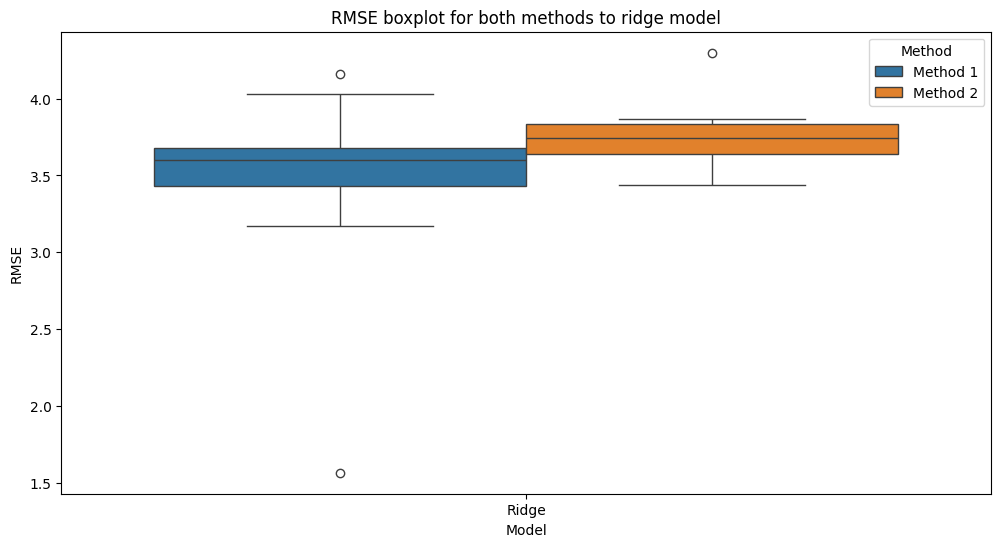

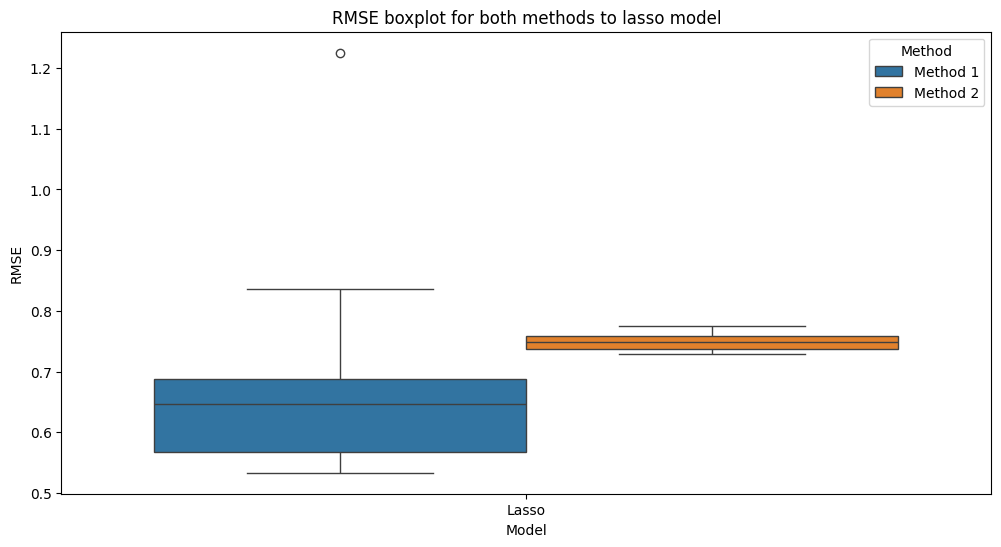

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns


rmse_values_ridge_method1 = [rmse for _, rmse in best_random_val_method1_ridge]
rmse_values_lasso_method1 = [rmse for _, rmse in best_random_val_method1_lasso]
rmse_values_ridge_method2 = [rmse for _, rmse in best_random_val_method2_ridge]
rmse_values_lasso_method2 = [rmse for _, rmse in best_random_val_method2_lasso]


data_ridge = {
    'RMSE': rmse_values_ridge_method1 + rmse_values_ridge_method2,
    'Method': ['Method 1'] * 10 + ['Method 2'] * 10,
    'Model': ['Ridge'] * 10 + ['Ridge'] * 10
}

df_ridge = pd.DataFrame(data_ridge)

# Create boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='RMSE', hue='Method', data=df_ridge)
plt.title('RMSE boxplot for both methods to ridge model')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.legend(title='Method')
plt.show()



data_lasso = {
    'RMSE': rmse_values_lasso_method1 + rmse_values_lasso_method2,
    'Method': ['Method 1'] * 10 + ['Method 2'] * 10,
    'Model': ['Lasso'] * 10 + ['Lasso'] * 10
}

df_lasso = pd.DataFrame(data_lasso)

# Create boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='RMSE', hue='Method', data=df_lasso)
plt.title('RMSE boxplot for both methods to lasso model')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.legend(title='Method')
plt.show()

In [38]:
##### YOUR CODE ENDS ##### (please do not delete this line)

#### <font color='purple'>(d) Comment on why the results look like they do? In general, when tuning parameters, is it better to use one training-validation split or K-fold cross-validation? Why?

## **Answer:** Ridge model results look consistent in both methods, but in method 2, the results were slightly worse, and method 1 got an extreme outlier. Lasso model results show a notable difference between both methods. Method 2 shows consistent results but bad performance compared to Method 1. Method 1 has an extreme outlier too. So, lasso and ridge both are regularization techniques; ridge puts a penalty on the sum of the absolute values of the coeff, whereas lasso shrinks the coeff to zero, and this will result in dissimilar performance. Method 1 wasn't as regularized as Method 2, and that's why it got better performance.

## The better to use is K-fold cross validation, despite results showing that using one training-validation split gives better performance but the model stability by ensuring that model does not overfit or underfit, and method 1 is more prone to variance, unlike method 2, which calculates the mean of rsme.

## Task 5. Regularization parameter effect on the coefficients  (1 point)

#### <font color='purple'>(a) The regularization parameter influences the values of the coefficients. Create two plots (one for Ridge and one for Lasso) that have the regularization parameter on the x-axis and coefficient values on the y-axis. You don't have to take all 99 values, you can take for example the first 20. Show each coefficient as a line (on the same plot) and comment on what happens when the regularization parameter increases. </font>

In [39]:
##### YOUR CODE STARTS ##### (please do not delete this line)

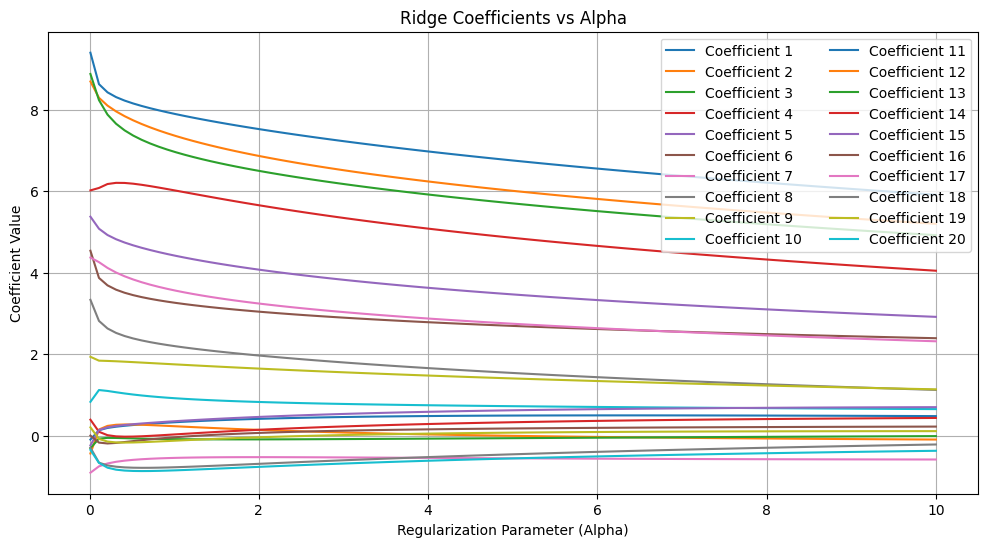

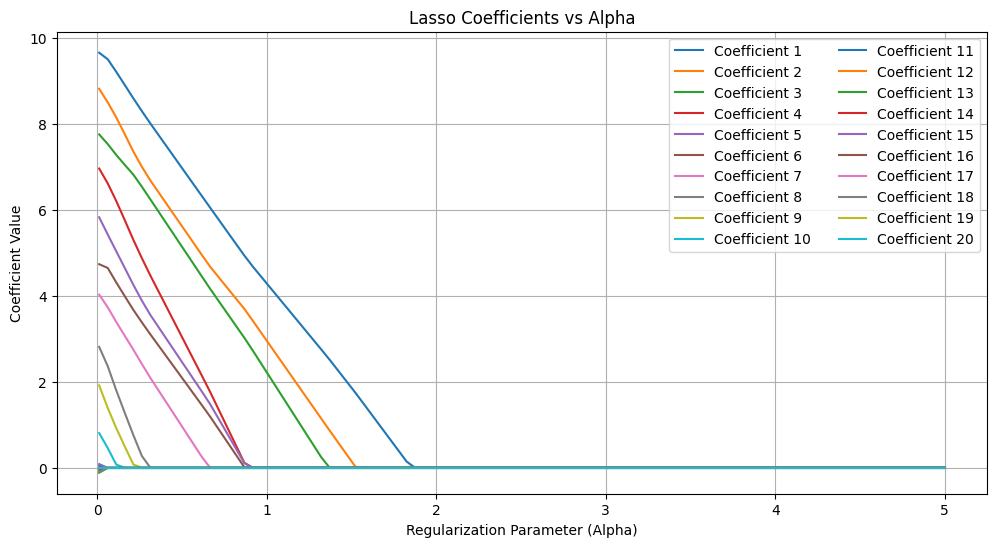

In [40]:
alphas_ridge = np.linspace(0.01, 10, 100)
ridge_coefs = []
for alpha in alphas_ridge:
    model_ridge = Ridge(alpha=alpha).fit(trainX, trainY)
    ridge_coefs.append(model_ridge.coef_[:20])


ridge_coefs = np.array(ridge_coefs)

# Plot for Ridge
plt.figure(figsize=(12, 6))
for i in range(20):
    plt.plot(alphas_ridge, ridge_coefs[:, i], label=f'Coefficient {i+1}')
plt.title('Ridge Coefficients vs Alpha')
plt.xlabel('Regularization Parameter (Alpha)')
plt.ylabel('Coefficient Value')
plt.legend(loc='best', ncol=2)
plt.grid(True)
plt.show()




alphas_lasso = np.linspace(0.01, 5, 100)
lasso_coefs = []
for alpha in alphas_ridge:
    model_lasso = Lasso(alpha=alpha).fit(trainX, trainY)
    lasso_coefs.append(model_lasso.coef_[:20])

lasso_coefs = np.array(lasso_coefs)

# Plot for Lasso
plt.figure(figsize=(12, 6))
for i in range(20):
    plt.plot(alphas_lasso, lasso_coefs[:, i], label=f'Coefficient {i+1}')
plt.title('Lasso Coefficients vs Alpha')
plt.xlabel('Regularization Parameter (Alpha)')
plt.ylabel('Coefficient Value')
plt.legend(loc='best', ncol=2)
plt.grid(True)
plt.show()


In [41]:
##### YOUR CODE ENDS ##### (please do not delete this line)

#### <font color='purple'>(b) What does Ridge regression do and what does Lasso regression do? How do they differ? </font>

## **Answer:** Ridge regression shrinks coeff but keeps them non-zero. Where, Lasso regression can make some coeff to zero,  it is effective for feature selection.

## The difference is that Ridge keeps all variables, and Lasso can remove variables by making their coeff to zero.

## Task 6. Evaluating different models  (1 point)

#### <font color='purple'>(a) Choose the values of alpha for Ridge and Lasso according to subtask (4b). Now let's see which model works best for our data by evaluating the test RMSE. Compare the following models by reporting the training and testing set RMSE: </font>

1. Non-regularized linear regression
2. Ridge regression with your chosen parameter
3. Lasso regression with your chosen parameter
4. A "dumb" model that always predicts the mean value of y_train
5. An ideal model that the instructors have used for generating the data (the true coefficients are [10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 0, ..., 0] and intercept 0).

In [42]:
##### YOUR CODE STARTS ##### (please do not delete this line)

In [43]:
from sklearn.linear_model import LinearRegression

# no regularization linear regression
lin_reg = LinearRegression().fit(trainX, trainY)
train_pred_lin_reg, test_pred_lin_reg = lin_reg.predict(trainX), lin_reg.predict(testX)
train_rmse_lin_reg, test_rmse_len_reg = np.sqrt(mean_squared_error(trainY, train_pred_lin_reg)), np.sqrt(mean_squared_error(testY, test_pred_lin_reg))

# ridge regression with alpha from task 4b
ridge_reg = Ridge(alpha=0.9181818181818182).fit(trainX, trainY)
train_pred_ridge, test_pred_ridge = ridge_reg.predict(trainX), ridge_reg.predict(testX)
train_rmse_ridge, test_rmse_ridge = np.sqrt(mean_squared_error(trainY, train_pred_ridge)), np.sqrt(mean_squared_error(testY, test_pred_ridge))

# lasso regression with alpha from task 4b
lasso_reg = Lasso(alpha=0.11080808080808081).fit(trainX, trainY)
train_pred_lasso, test_pred_lasso = lasso_reg.predict(trainX), lasso_reg.predict(testX)
train_rmse_lasso, test_rmse_lasso = np.sqrt(mean_squared_error(trainY, train_pred_lasso)), np.sqrt(mean_squared_error(testY, test_pred_lasso))

# dumb model always predict mean of y_train
mean_train = np.mean(trainY)
# we take the mean_train value and form a full array that consist of this mean and it's length is trainX.shape[0]
train_pred_dumb, test_pred_dumb = np.full(trainX.shape[0], mean_train), np.full(testX.shape[0], mean_train)
train_rmse_dumb, test_rmse_dumb= np.sqrt(mean_squared_error(trainY, train_pred_dumb)), np.sqrt(mean_squared_error(testY, test_pred_dumb))

# ideal model
# the number of features - 10 aka the array we were given just to form the same coeff numbers like other models
ideal_coeffs = np.array([10, 9, 8, 7, 6, 5, 4, 3, 2, 1] + [0] * (trainX.shape[1] - 10)) 
ideal_intercept = 0
train_pred_ideal = np.dot(trainX, ideal_coeffs) + ideal_intercept
test_pred_ideal = np.dot(testX, ideal_coeffs) + ideal_intercept
train_rmse_ideal = np.sqrt(mean_squared_error(trainY, train_pred_ideal))
test_rmse_ideal = np.sqrt(mean_squared_error(testY, test_pred_ideal))

# Print the results
print(f"no regularization linear regression - train rrmse: {train_rmse_lin_reg}, test rmse: {test_rmse_len_reg}")
print(f"ridge regression - train rrmse: {train_rmse_ridge}, test rmse: {test_rmse_ridge}")
print(f"lasso regression - train rrmse: {train_rmse_lasso}, test rmse: {test_rmse_lasso}")
print(f"dumb model - train rrmse: {train_rmse_dumb}, test rmse: {test_rmse_dumb}")
print(f"ideal model - train rrmse: {train_rmse_ideal}, test rmse: {test_rmse_ideal}")


no regularization linear regression - train rrmse: 2.3112137341593457e-14, test rmse: 7.715131133028365
ridge regression - train rrmse: 0.48786148415494396, test rmse: 4.3823643405189
lasso regression - train rrmse: 0.8626680828921126, test rmse: 1.1090509076262947
dumb model - train rrmse: 11.047120424571311, test rmse: 11.321862747375917
ideal model - train rrmse: 0.5749418580106603, test rmse: 0.6006181029383404


In [44]:
##### YOUR CODE ENDS ##### (please do not delete this line)

#### <font color='purple'>(b) Which method gives the best results and by looking at which value do you claim that? Why did this method work the best in your opinion?

## **Answer:** The best model is the ideal model then lasso model and claimed this by the value of rsme
## It is the best because it provided least rsme in the test data

#### <font color='purple'>(c) Were all of the "smart" models better than the "dumb" one (baseline). What would it mean if the learned model would give worse results?

## **Answer:** Yes, it was much better

## It would mean that the model isn't able to predict the target to an extent and that may happen due to data leakage or model too complex etc..

#### <font color='purple'>(d) Were the learned models far from the ideal one? Were the learned coefficients similar to the true ones?

## **Answer:** Some models were far and some were relatively close like lasso model

## According to the rsme not very similar except for lasso

#### <font color='purple'>(e) Which model overfitted the most, how can you see that?

## **Answer:** The most overfitted model is ridge model

## I can see that the rsme on the train data was even lower than the ideal model

#### <font color='purple'>(f) Are regularized methods always better than methods without regularization (not only in this case but in general). Why/why not?

## **Answer:** Regularized methods are not always better than non-regularized ones. It depends on the data itself. Regularization help in preventing overfitting, and can improve feature selection. On the other hand, regularization may also form a bias that leads to underfitting. For instance, simpler datasets with fewer features that uses non-regularized model will perform better than regularized models.


 ## <font color='red'>This was the last task! Please restart and run all before submission!</font>